In [1]:
import set_jupyter_env
from apiServer import *
from stats import Stats

In [3]:
nerlnet_api_server = ApiServer()

In [4]:
nerlnet_api_server.help()


__________NERLNET CHECKLIST__________
0. Run this Jupyter in the folder of generated .py files!
1. Nerlnet configuration files are located at config directory
   Make sure data and jsons in correct folder, and jsons include the correct paths
    * Data includes: labeled prediction csv, training file, prediction file
    * Prediction CSVs need to be ordered the same!
    * jsonsDir is set to /usr/local/lib/nerlnet-lib/NErlNet/inputJsonsFiles
    * inputDataDir is set to /tmp/nerlnet/data/NerlnetData-master/nerlnet
            
____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                       shows available arch / conn / exp layouts
-printArchParams(Num)               print description of selected arch file
-selectJsons():                     get input from user for arch / conn / exp selection
-setJsons(arch, conn, exp):         set layout in code
-getUserJsons():                    returns the selected arch / conn / exp
-initialization(arc

In [5]:
nerlnet_api_server.showJsons()


Distributed Configuration Files
--------------------

0.	dc_test_synt_1d_2c_1s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.json
16.	conn_6RouterCycle8Clients1Source.json
17.	conn_6RouterLine6Clients1Source.json
18.	conn_8RouterCycle8Clients1Source.json
19.	conn_test_synt_1d_2c_1s_4r_4w.json

Experiments Flow Files
--------------------

0.	exp_1Worker1SourceAE.json
1.	exp_1Worker1SourceHealth.json
2.	exp_1Worker1SourceHealth_david.json
3.	exp

In [6]:
DC = 0
CONN = 19
EXP = 17
nerlnet_api_server.setJsons(DC , CONN ,EXP)

In [7]:
dc_json , conn_json , exp_json = nerlnet_api_server.getUserJsons()
print(dc_json)

/usr/local/lib/nerlnet-lib/NErlNet/inputJsonsFiles/DistributedConfig/dc_test_synt_1d_2c_1s_4r_4w.json


In [8]:
exp_name = "nerlnet_exp"
nerlnet_api_server.initialization(exp_name , dc_json , conn_json , exp_json)

[INFO][2024-01-30 20:09:39,438] 
Network components:
                 Receiver's Address: http://10.0.0.5:8099
                 Frequency: 60 [batches/sec]
                 Batchsize: 50 [samples]
                 devicesIp: ['10.0.0.5']
                 mainServerIp: 10.0.0.5
                 mainServerPort: 8081
                 apiServerIp: 10.0.0.5
                 apiServerPort: 8099
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1']
                 Routers: ['r1', 'r2', 'r3', 'r4']
[INFO][2024-01-30 20:09:39,439] Connections:
[INFO][2024-01-30 20:09:39,440] 		 r1 : ['mainServer', 'r2']
[INFO][2024-01-30 20:09:39,441] 		 r2 : ['r3', 's1']
[INFO][2024-01-30 20:09:39,441] 		 r3 : ['r4', 'c1']
[INFO][2024-01-30 20:09:39,442] 		 r4 : ['r1', 'c2']
[INFO][2024-01-30 20:09:39,443] Initializing ApiServer receiver thread


Experiment Data:
        Data source:    synthetic
        Batches to send per phase:
            Training:   2000
            Prediction: 2000
        
 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-01-30 20:09:41,450] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


Got statistics from main server
Res data: c2&bytes_sent:53930:int#messages_sent:8007:int#bad_messages:0:int#batches_sent:0:int#messages_received:8007:int#batches_received:0:int#bytes_received:39972:int#batches_dropped:0:int#messages_dropped:0:int#w4^bytes_sent$0$int@empty_batches$0$int@bad_messages$0$int@batches_dropped_predict$3$int@batches_sent_predict$0$int@nan_loss_count$0$int@batches_received_predict$998$int@batches_dropped_train$0$int@acc_time_training$0$int@bytes_received$0$int@average_time_prediction$0$int@batches_received_train$1000$int@average_time_training$0$int@acc_time_prediction$0$int@batches_sent_train$0$int@w3^bytes_sent$0$int@empty_batches$0$int@bad_messages$0$int@batches_dropped_predict$5$int@batches_sent_predict$0$int@nan_loss_count$0$int@batches_received_predict$996$int@batches_dropped_train$1$int@acc_time_training$0$int@bytes_received$0$int@average_time_prediction$0$int@batches_received_train$999$int@average_time_training$0$int@acc_time_prediction$0$int@batches_sen

In [9]:
nerlnet_api_server.sendJsonsToDevices()

[INFO][2024-01-30 20:11:07,454] Sending distributed configurations to devices is completed


In [10]:
nerlnet_api_server.sendDataToSources(PHASE_TRAINING)

[INFO][2024-01-30 20:12:09,979] Sending data to sources
[INFO][2024-01-30 20:12:09,982] Reading csv file: /tmp/nerlnet/data/NerlnetData-master/nerlnet/synthetic/synthetic_training.csv for phase Training
[INFO][2024-01-30 20:12:12,860] Data sent to sources
[INFO][2024-01-30 20:12:14,613] Data ready in sources


In [11]:
nerlnet_api_server.train()

[INFO][2024-01-30 20:12:36,308] Training Phase requested from Main Server
[INFO][2024-01-30 20:12:56,384] Training Phase of nerlnet_exp completed


True

In [12]:
nerlnet_api_server.sendDataToSources(PHASE_PREDICTION)

[INFO][2024-01-30 20:13:25,907] Sending data to sources
[INFO][2024-01-30 20:13:25,911] Reading csv file: /tmp/nerlnet/data/NerlnetData-master/nerlnet/synthetic/synthetic_prediction.csv for phase Prediction
[INFO][2024-01-30 20:13:28,175] Data sent to sources
[INFO][2024-01-30 20:13:29,819] Data ready in sources


In [13]:
nerlnet_api_server.predict()

[INFO][2024-01-30 20:13:46,247] Predict phase starts
[INFO][2024-01-30 20:13:46,248] Prediction Phase requested from Main Server
[INFO][2024-01-30 20:14:07,006] Prediction Phase of nerlnet_exp completed


True

In [14]:
exp_inst = nerlnet_api_server.get_experiment(exp_name)

In [15]:
exp_stats = Stats(exp_inst)

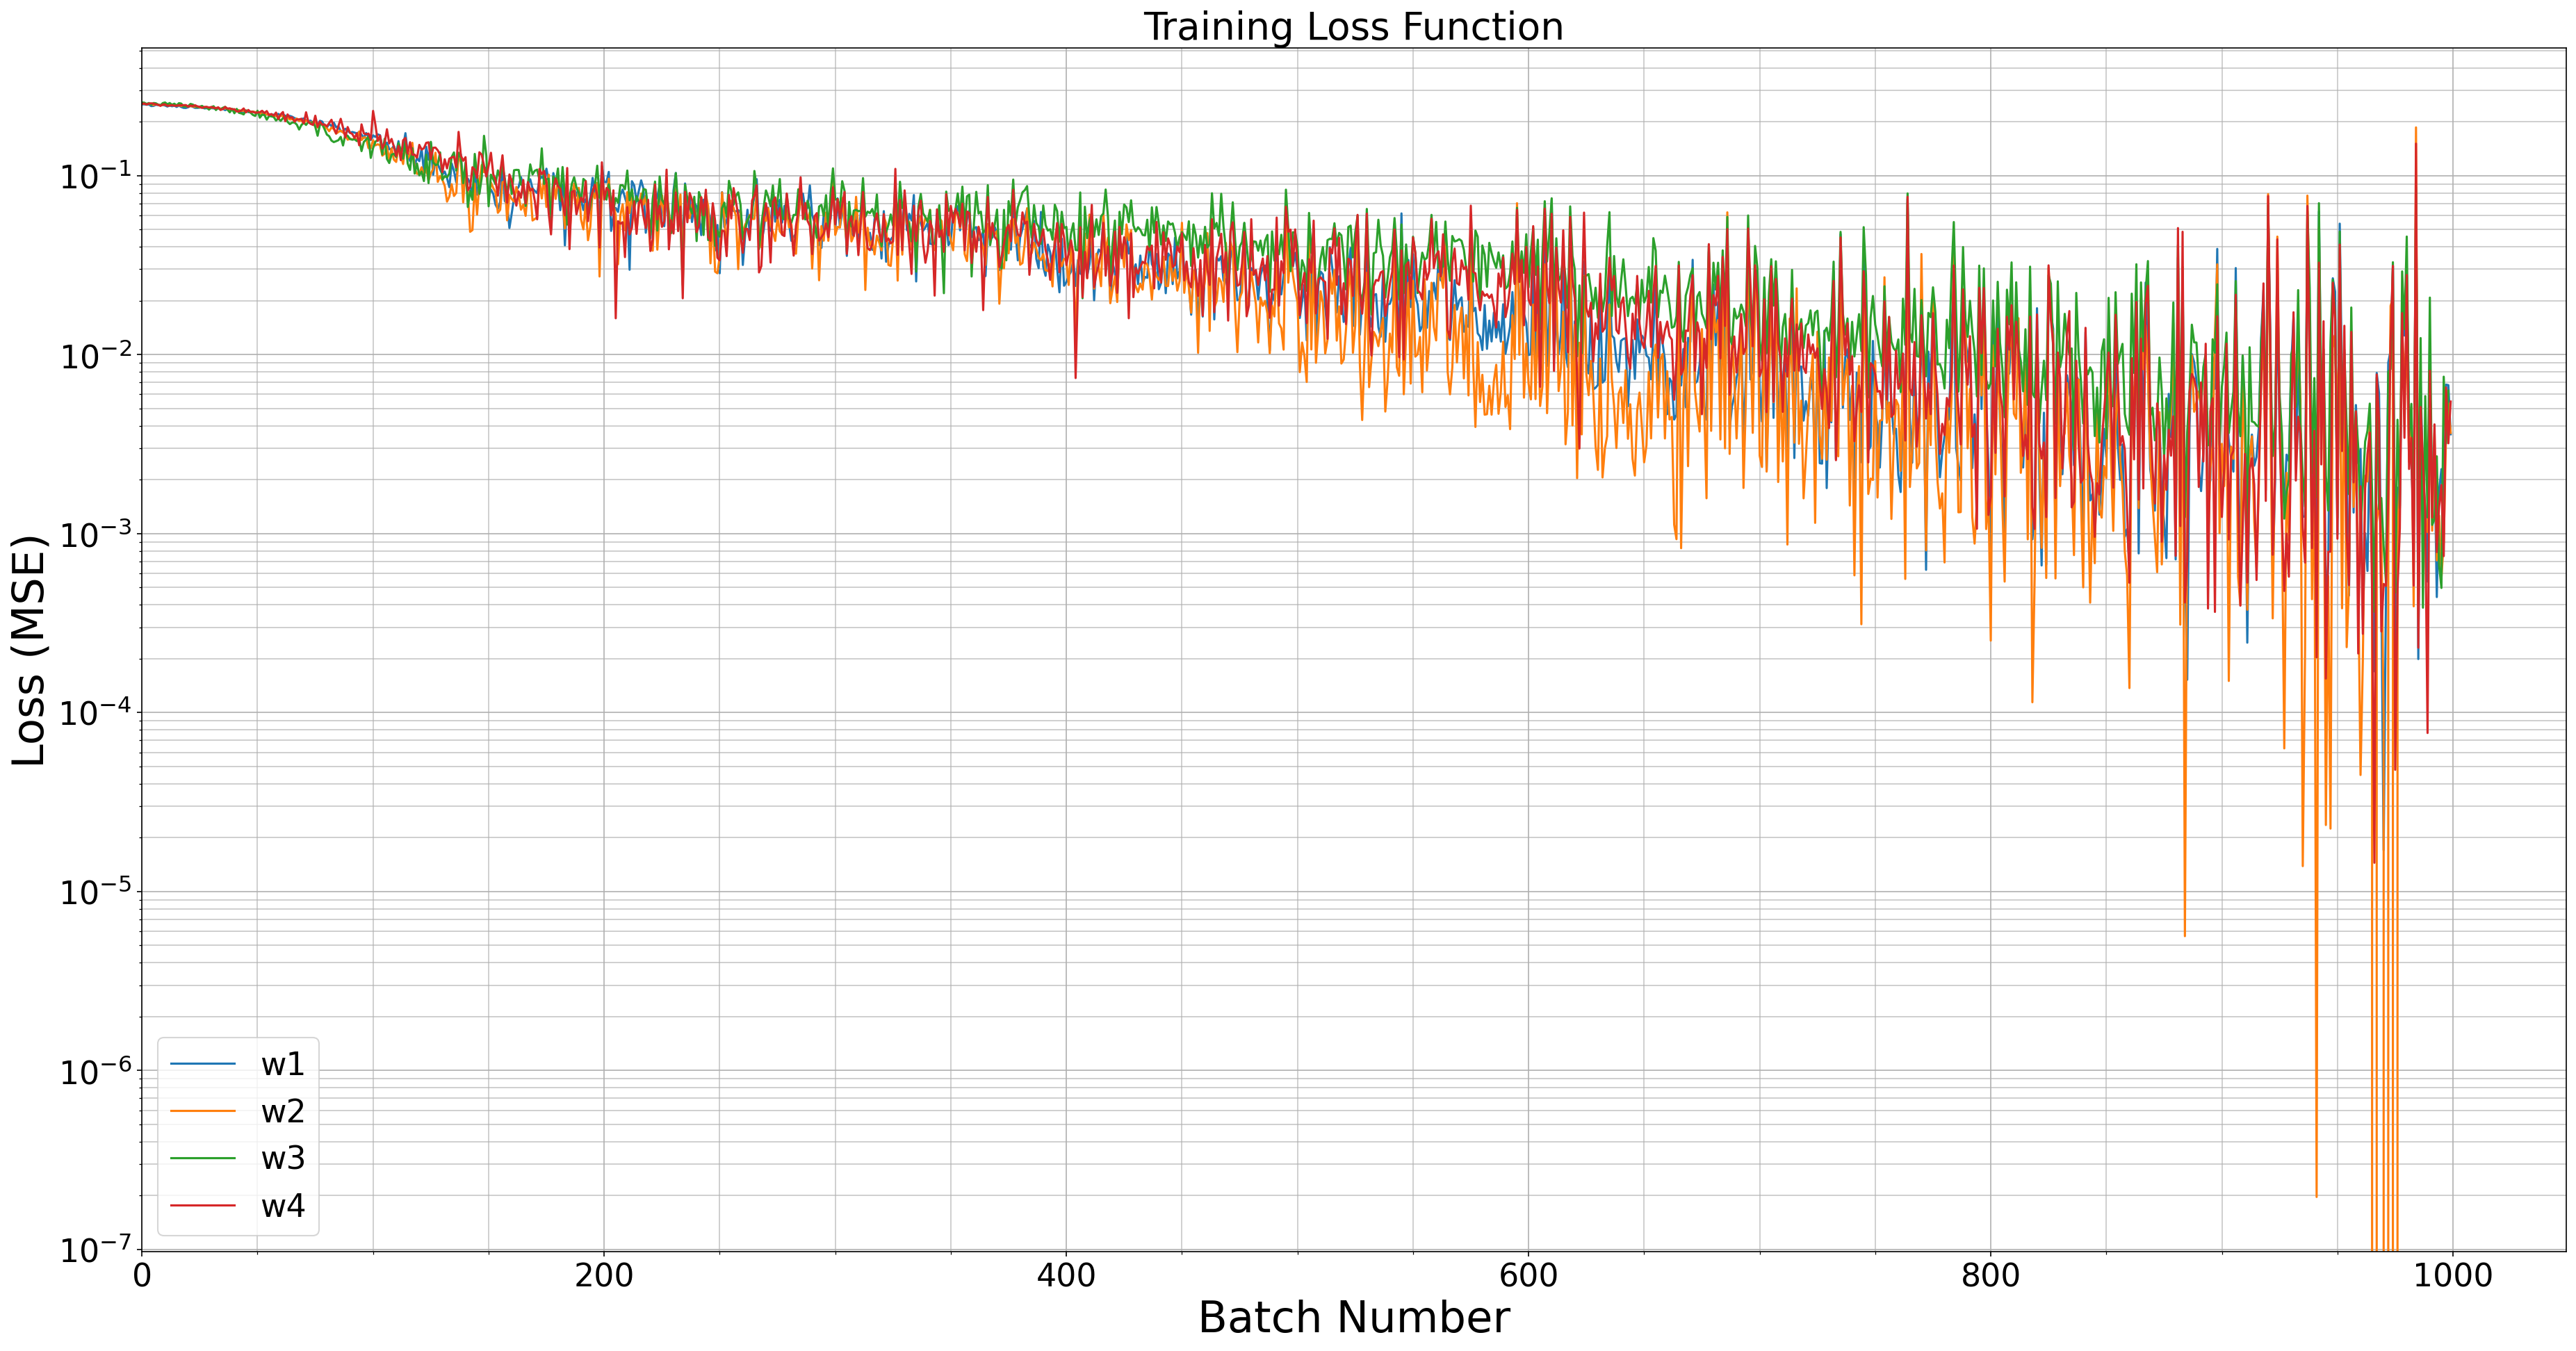

<Figure size 640x480 with 0 Axes>

In [19]:
loss = exp_stats.get_loss(plot=True)

In [20]:
exp_stats.get_loss_min()

OrderedDict([('w1', 1.703606358205434e-05),
             ('w2', 0.0),
             ('w3', 0.00036600977182388306),
             ('w4', 1.4487001863017213e-05)])

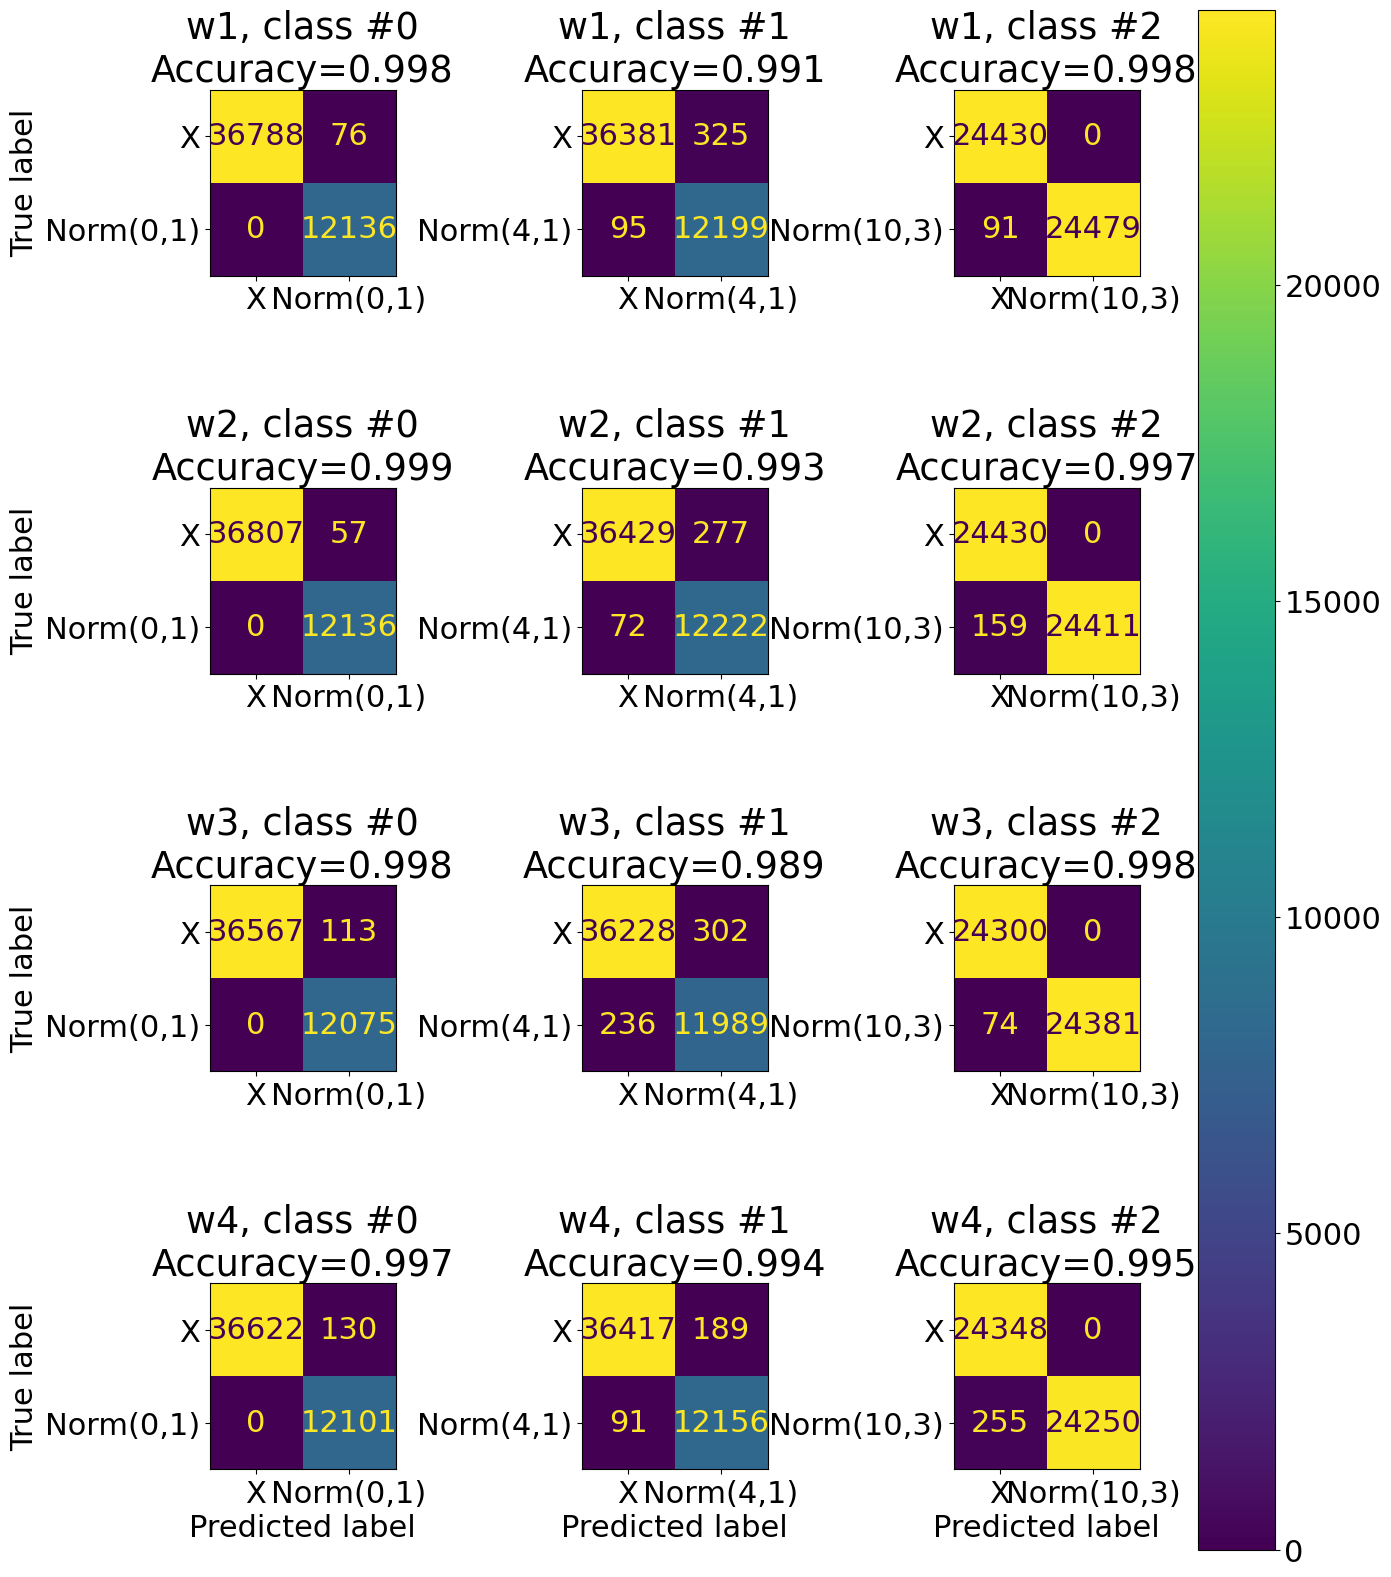

In [22]:
conf_mats = exp_stats.get_confusion_matrices(plot=True)

In [25]:
ret = exp_stats.get_model_performence_stats(conf_mats , printStats=True , show=True)

[INFO][2024-01-30 20:31:03,705] worker w1 label: 0 tn: 36788, fp: 76, fn: 0, tp: 12136
[INFO][2024-01-30 20:31:03,713] worker w1 label: 1 tn: 36381, fp: 325, fn: 95, tp: 12199
[INFO][2024-01-30 20:31:03,716] worker w1 label: 2 tn: 24430, fp: 0, fn: 91, tp: 24479
[INFO][2024-01-30 20:31:03,719] worker w2 label: 0 tn: 36807, fp: 57, fn: 0, tp: 12136
[INFO][2024-01-30 20:31:03,720] worker w2 label: 1 tn: 36429, fp: 277, fn: 72, tp: 12222
[INFO][2024-01-30 20:31:03,720] worker w2 label: 2 tn: 24430, fp: 0, fn: 159, tp: 24411
[INFO][2024-01-30 20:31:03,721] worker w3 label: 0 tn: 36567, fp: 113, fn: 0, tp: 12075
[INFO][2024-01-30 20:31:03,723] worker w3 label: 1 tn: 36228, fp: 302, fn: 236, tp: 11989
[INFO][2024-01-30 20:31:03,724] worker w3 label: 2 tn: 24300, fp: 0, fn: 74, tp: 24381
[INFO][2024-01-30 20:31:03,724] worker w4 label: 0 tn: 36622, fp: 130, fn: 0, tp: 12101
[INFO][2024-01-30 20:31:03,725] worker w4 label: 1 tn: 36417, fp: 189, fn: 91, tp: 12156
[INFO][2024-01-30 20:31:03,725]

w1, class #0:
OrderedDict([('TN', 36788), ('FP', 76), ('FN', 0), ('TP', 12136), ('Accuracy', 0.9984489795918368), ('Balanced Accuracy', 0.9989691840277778), ('Precision', 0.9937766131673763), ('Recall', 1.0), ('True Negative Rate', 0.9979383680555556), ('Informedness', 0.9979383680555556), ('F1', 0.9968785937243305)])

w1, class #1:
OrderedDict([('TN', 36381), ('FP', 325), ('FN', 95), ('TP', 12199), ('Accuracy', 0.9914285714285714), ('Balanced Accuracy', 0.991709257519404), ('Precision', 0.9740498243372724), ('Recall', 0.9922726533268261), ('True Negative Rate', 0.9911458617119817), ('Informedness', 0.983418515038808), ('F1', 0.9830767990974294)])

w1, class #2:
OrderedDict([('TN', 24430), ('FP', 0), ('FN', 91), ('TP', 24479), ('Accuracy', 0.9981428571428571), ('Balanced Accuracy', 0.9981481481481482), ('Precision', 1.0), ('Recall', 0.9962962962962963), ('True Negative Rate', 1.0), ('Informedness', 0.9962962962962965), ('F1', 0.9981447124304267)])

w2, class #0:
OrderedDict([('TN', 368

In [27]:
print(nerlnet_api_server.communication_stats())

KeyboardInterrupt: 